In [1]:
import duckdb 

con = duckdb.connect('C:\Project_Files\eda_demo\duckdb\demo.duckdb')

con.sql('from names;').show()

┌─────────┬─────────┬───────┬───────────┬────────┐
│  state  │ gender  │ year  │   name    │ number │
│ varchar │ varchar │ int64 │  varchar  │ int64  │
├─────────┼─────────┼───────┼───────────┼────────┤
│ AK      │ F       │  1989 │ Jessica   │    112 │
│ AK      │ F       │  1989 │ Ashley    │    106 │
│ AK      │ F       │  1989 │ Amanda    │     93 │
│ AK      │ F       │  1989 │ Sarah     │     93 │
│ AK      │ F       │  1989 │ Samantha  │     74 │
│ AK      │ F       │  1989 │ Jennifer  │     68 │
│ AK      │ F       │  1989 │ Danielle  │     58 │
│ AK      │ F       │  1989 │ Stephanie │     56 │
│ AK      │ F       │  1989 │ Emily     │     54 │
│ AK      │ F       │  1989 │ Brittany  │     53 │
│ ·       │ ·       │    ·  │  ·        │      · │
│ ·       │ ·       │    ·  │  ·        │      · │
│ ·       │ ·       │    ·  │  ·        │      · │
│ CA      │ F       │  2019 │ Zion      │     22 │
│ CA      │ F       │  2019 │ Ziva      │     22 │
│ CA      │ F       │  2019 │ A

# What Were the Most Common Names in 1989 vs 2019

In [20]:
# find the most common female names in 1989
con.sql("select distinct name, number from names where gender = 'F'and year = 1989 order by number desc limit 10;")

┌───────────┬────────┐
│   name    │ number │
│  varchar  │ int64  │
├───────────┼────────┤
│ Jessica   │   6539 │
│ Ashley    │   4510 │
│ Amanda    │   3852 │
│ Ashley    │   3534 │
│ Jennifer  │   3526 │
│ Jessica   │   3474 │
│ Stephanie │   3431 │
│ Elizabeth │   3065 │
│ Brittany  │   3018 │
│ Sarah     │   2996 │
├───────────┴────────┤
│ 10 rows  2 columns │
└────────────────────┘

In [22]:
# find the most common male names in 1989
con.sql("select distinct name, number from names where gender = 'M' and year = 1989 order by number desc limit 10;")

┌─────────────┬────────┐
│    name     │ number │
│   varchar   │ int64  │
├─────────────┼────────┤
│ Michael     │   7857 │
│ Christopher │   6489 │
│ Michael     │   6086 │
│ Daniel      │   5608 │
│ David       │   5354 │
│ Matthew     │   4744 │
│ Andrew      │   4413 │
│ Joshua      │   4290 │
│ Jose        │   4178 │
│ Christopher │   4060 │
├─────────────┴────────┤
│ 10 rows    2 columns │
└──────────────────────┘

In [23]:
# find the most common female names in 2019
con.sql("select distinct name, number from names where gender = 'F'and year = 2019 order by number desc limit 10;")

┌──────────┬────────┐
│   name   │ number │
│ varchar  │ int64  │
├──────────┼────────┤
│ Olivia   │   2608 │
│ Emma     │   2395 │
│ Mia      │   2361 │
│ Sophia   │   2095 │
│ Camila   │   2066 │
│ Emma     │   2039 │
│ Isabella │   2014 │
│ Olivia   │   1951 │
│ Isabella │   1740 │
│ Mia      │   1695 │
├──────────┴────────┤
│      10 rows      │
└───────────────────┘

In [24]:
# find the most common male names in 2019
con.sql("select distinct name, number from names where gender = 'M'and year = 2019 order by number desc limit 10;")

┌───────────┬────────┐
│   name    │ number │
│  varchar  │ int64  │
├───────────┼────────┤
│ Noah      │   2677 │
│ Liam      │   2395 │
│ Liam      │   2222 │
│ Mateo     │   2221 │
│ Sebastian │   2155 │
│ Ethan     │   2096 │
│ Noah      │   2079 │
│ Julian    │   1856 │
│ Alexander │   1837 │
│ Benjamin  │   1754 │
├───────────┴────────┤
│ 10 rows  2 columns │
└────────────────────┘

In [25]:
# creating dataframe from duckdb table

df = con.sql("from names").df()

In [26]:
df.head()

,state,gender,year,name,number
0,AK,F,1989,Jessica,112
1,AK,F,1989,Ashley,106
2,AK,F,1989,Amanda,93
3,AK,F,1989,Sarah,93
4,AK,F,1989,Samantha,74


In [55]:
# make a pivot table with sum of the count of names with the years as columns
delta_names = df.pivot_table(values="number", index="name", columns="year", aggfunc="sum")
#delta_names.iloc[:,1]
delta_names["change"] = delta_names.loc[:,2019] - delta_names.loc[:,1989]
delta_names["percent_change_1989_2019"] = delta_names.loc[:,2019].div(delta_names.loc[:,1989]).sub(1).mul(100)
delta_names.sort_values(1989,ascending=False).head(20)["percent_change_1989_2019"]

name
Michael       -83.907836
Christopher   -86.913682
Jessica       -98.057647
Ashley        -95.796460
Matthew       -79.692788
Joshua        -85.081237
Brittany      -99.291154
Amanda        -97.981303
David         -74.653073
Daniel        -69.960148
Andrew        -80.559296
Justin        -92.375295
James         -59.850746
Robert        -83.999337
Joseph        -69.557965
John          -70.508282
Ryan          -76.328886
Nicholas      -83.691503
Sarah         -88.147750
Samantha      -86.514097
Name: percent_change_1989_2019, dtype: float64

In [57]:
delta_names.sort_values("percent_change_1989_2019")

year,1989,2019,change,percent_change_1989_2019
name,,,,
Kristin,6076.0,9.0,-6067.0,-99.851876
Brittney,7863.0,17.0,-7846.0,-99.783798
Felicia,2750.0,9.0,-2741.0,-99.672727
Brandi,3251.0,11.0,-3240.0,-99.661643
Kelli,1724.0,6.0,-1718.0,-99.651972
...,...,...,...,...
Zymere,NaN,5.0,NaN,NaN
Zymir,NaN,55.0,NaN,NaN
Zyon,NaN,171.0,NaN,NaN


In [59]:
# make a pivot table with sum of the count of names with the years as columns
delta_names_md = df[df["state"]== "MD"].pivot_table(values="number", index="name", columns="year", aggfunc="sum")
#delta_names_md.iloc[:,1]
delta_names_md["change"] = delta_names_md.loc[:,2019] - delta_names_md.loc[:,1989]
delta_names_md["percent_change_1989_2019"] = delta_names_md.loc[:,2019].div(delta_names_md.loc[:,1989]).sub(1).mul(100)
delta_names_md.sort_values(1989,ascending=False).head(20)["percent_change_1989_2019"]


name
Michael       -83.593170
Christopher   -87.640449
Ashley        -93.250260
Brittany      -98.561947
Matthew       -81.798002
Jessica       -97.708082
Joshua        -78.055191
David         -72.777778
James         -61.624650
Amanda        -98.583569
John          -72.238806
Robert        -83.713851
Andrew        -81.901840
Justin        -91.219512
Daniel        -63.577236
Joseph        -70.000000
Sarah         -88.986014
William       -62.226277
Ryan          -72.161172
Kevin         -89.338235
Name: percent_change_1989_2019, dtype: float64

In [68]:
# make a pivot table with sum of the count of names with the years as columns
delta_names_md = df[(df["state"] == "MD") & (df["gender"] == "M")].pivot_table(values="number", index="name", columns="year", aggfunc="sum")
#delta_names_md.iloc[:,1]
delta_names_md["change"] = delta_names_md.loc[:,2019] - delta_names_md.loc[:,1989]
delta_names_md["percent_change_1989_2019"] = delta_names_md.loc[:,2019].div(delta_names_md.loc[:,1989]).sub(1).mul(100)
delta_names_md.sort_values(1989,ascending=False).head(20)["percent_change_1989_2019"]

name
Michael       -83.532042
Christopher   -87.582314
Matthew       -81.798002
Joshua        -78.055191
David         -72.777778
James         -61.624650
John          -72.238806
Robert        -83.713851
Andrew        -81.901840
Daniel        -63.577236
Justin        -91.219512
Joseph        -70.000000
William       -62.226277
Kevin         -89.338235
Ryan          -75.418994
Nicholas      -83.661417
Brandon       -87.704918
Brian         -90.754258
Thomas        -69.975186
Anthony       -60.309278
Name: percent_change_1989_2019, dtype: float64

# Do people like shorter names now?

In [82]:
con.sql("""
(select year, name, len(name) as length, number
from names
where year = 1989
order by number desc
limit 10)

union all

(select year, name, len(name) as length, number
from names
where year = 2019
order by number desc
limit 10);

""")

┌───────┬─────────────┬────────┬────────┐
│ year  │    name     │ length │ number │
│ int64 │   varchar   │ int64  │ int64  │
├───────┼─────────────┼────────┼────────┤
│  1989 │ Michael     │      7 │   7857 │
│  1989 │ Jessica     │      7 │   6539 │
│  1989 │ Christopher │     11 │   6489 │
│  1989 │ Michael     │      7 │   6086 │
│  1989 │ Daniel      │      6 │   5608 │
│  1989 │ David       │      5 │   5354 │
│  1989 │ Matthew     │      7 │   4744 │
│  1989 │ Ashley      │      6 │   4510 │
│  1989 │ Andrew      │      6 │   4413 │
│  1989 │ Joshua      │      6 │   4290 │
│  2019 │ Noah        │      4 │   2677 │
│  2019 │ Olivia      │      6 │   2608 │
│  2019 │ Emma        │      4 │   2395 │
│  2019 │ Liam        │      4 │   2395 │
│  2019 │ Mia         │      3 │   2361 │
│  2019 │ Liam        │      4 │   2222 │
│  2019 │ Mateo       │      5 │   2221 │
│  2019 │ Sebastian   │      9 │   2155 │
│  2019 │ Ethan       │      5 │   2096 │
│  2019 │ Sophia      │      6 │  

In [92]:
name_length = con.sql("""
(select year, name, len(name) as length, number
from names
where year = 1989
order by number desc
limit 100)

union all

(select year, name, len(name) as length, number
from names
where year = 2019
order by number desc
limit 100);

""").df()

In [93]:
name_length[["year", "length"]].groupby("year").mean()

,length
year,
1989,6.72
2019,5.72


<Axes: title={'center': 'Distribution of Name Lengths in 1989'}, xlabel='name_length'>

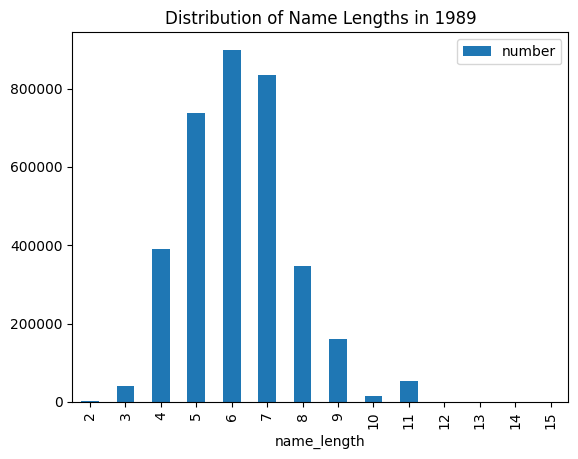

In [112]:
# Seeking a graph with the x axis as the length of the name 
# and y axis as the frequency of that name length in the dataset
name_frq = df.copy()
name_frq["name_length"] = name_frq["name"].str.len()
# name_frq[name_frq["year"] == 1989]
name_frq = name_frq[["year", "name_length", "number"]].groupby(["year", "name_length"]).sum()
name_frq.loc[1989].plot(kind="bar", title="Distribution of Name Lengths in 1989")

<Axes: title={'center': 'Distribution of Name Lengths in 2019'}, xlabel='name_length'>

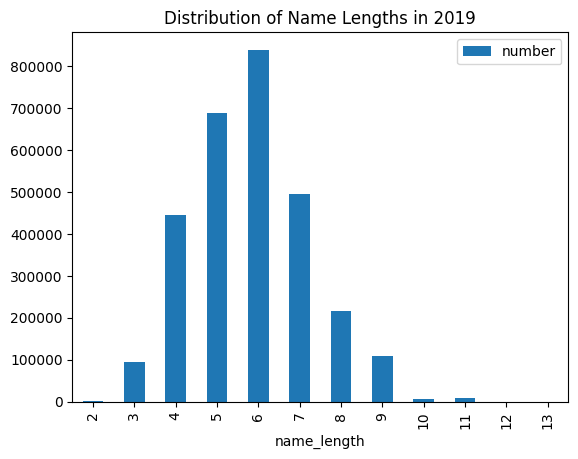

In [113]:
name_frq.loc[2019].plot(kind="bar", title="Distribution of Name Lengths in 2019")

In [122]:
name_frq.reset_index().pivot_table(values="number", index="name_length", columns="year")

year,1989,2019
name_length,,
2,972.0,1095.0
3,39355.0,95183.0
4,389726.0,444897.0
5,738749.0,688442.0
6,898760.0,838744.0
7,835159.0,495137.0
8,345597.0,217371.0
9,160219.0,108499.0
10,13704.0,7740.0


<Axes: title={'center': 'Name Length Distribution 1989 vs 2019'}, xlabel='name_length', ylabel='Percent of Total Names'>

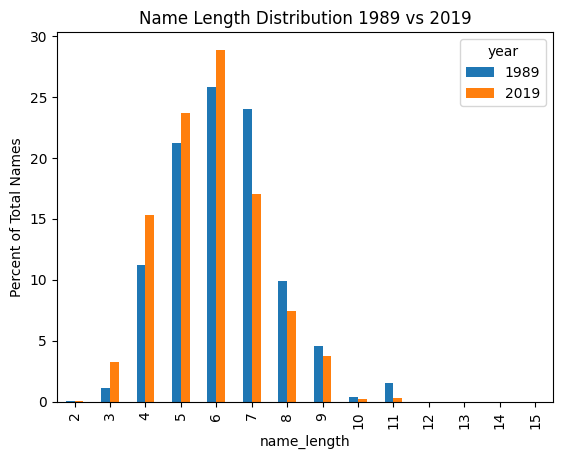

In [127]:
import pandas as pd

# Assuming you have already created the pivot table
pivot_table = name_frq.reset_index().pivot_table(values="number", index="name_length", columns="year")

# Calculate the percentage of column total for each entry
percentage_table = pivot_table.apply(lambda x: x / x.sum() * 100, axis=0)

percentage_table.plot(kind="bar", title="Name Length Distribution 1989 vs 2019", ylabel="Percent of Total Names")
# # Display the resulting percentage table
# print(percentage_table)

# The Demise of Stephen

In [156]:
con.sql("""
with eighty_nine as (
   select state, sum(number) as sum_89
   from names
   where name = 'Stephen' and year = 1989
   group by state
),
twenty_nineteen as (
   select state, sum(number) as sum_19
   from names
   where name = 'Stephen' and year = 2019
   group by state
)
select 
   e.state,
   (t.sum_19 - e.sum_89)/ e.sum_89 * 100 as percent_change_stephen_1989_2019
from eighty_nine e
join twenty_nineteen t on e.state = t.state
order by percent_change_stephen_1989_2019;
""")

┌─────────┬──────────────────────────────────┐
│  state  │ percent_change_stephen_1989_2019 │
│ varchar │              double              │
├─────────┼──────────────────────────────────┤
│ MA      │               -96.42058165548099 │
│ CO      │               -94.67455621301775 │
│ MO      │               -94.44444444444444 │
│ MN      │                -94.0677966101695 │
│ PA      │               -93.44919786096256 │
│ CT      │               -93.13725490196079 │
│ NY      │                -92.5531914893617 │
│ VA      │               -92.55014326647564 │
│ IL      │               -92.39904988123516 │
│ NJ      │               -91.48471615720524 │
│ ·       │                        ·         │
│ ·       │                        ·         │
│ ·       │                        ·         │
│ NE      │               -88.09523809523809 │
│ FL      │               -88.01996672212978 │
│ TX      │               -87.69063180827887 │
│ MS      │                            -87.5 │
│ IN      │  

In [157]:
stephen_df = con.sql("""
with eighty_nine as (
   select state, sum(number) as sum_89
   from names
   where name = 'Stephen' and year = 1989
   group by state
),
twenty_nineteen as (
   select state, sum(number) as sum_19
   from names
   where name = 'Stephen' and year = 2019
   group by state
)
select 
   e.state,
   (t.sum_19 - e.sum_89)/ e.sum_89 * 100 as percent_change_stephen_1989_2019
from eighty_nine e
join twenty_nineteen t on e.state = t.state
order by percent_change_stephen_1989_2019;
""").df()

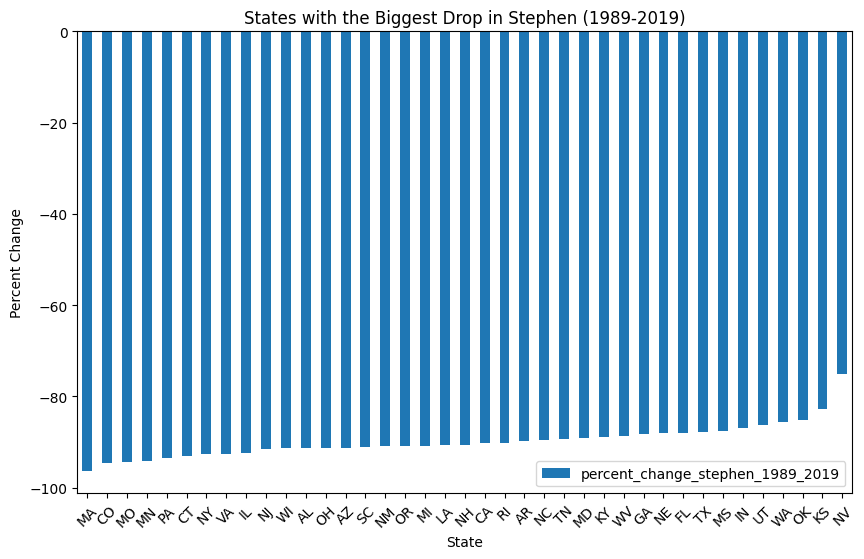

In [160]:
import matplotlib.pyplot as plt


# Sort the DataFrame by the 'percent_change_stephen_1989_2019' column in ascending order
stephen_df_sorted = stephen_df.sort_values('percent_change_stephen_1989_2019')

# Select the top 5 states with the biggest drop using head()


# Create a bar plot of the top 5 states
stephen_df_sorted.plot(x='state', y='percent_change_stephen_1989_2019', kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Percent Change')
plt.title('States with the Biggest Drop in Stephen (1989-2019)')
plt.xticks(rotation=45)
plt.show()

In [163]:
s_names_df = con.sql("""
with eighty_nine as (
   select state, sum(number) as sum_89
   from names
   where lower(name) like 's%' and year = 1989
   group by state
),
twenty_nineteen as (
   select state, sum(number) as sum_19
   from names
   where lower(name) like 's%' and year = 2019
   group by state
)
select 
   e.state,
   (t.sum_19 - e.sum_89)/ e.sum_89 * 100 as percent_change_s_1989_2019
from eighty_nine e
join twenty_nineteen t on e.state = t.state
order by percent_change_s_1989_2019;
""").df()

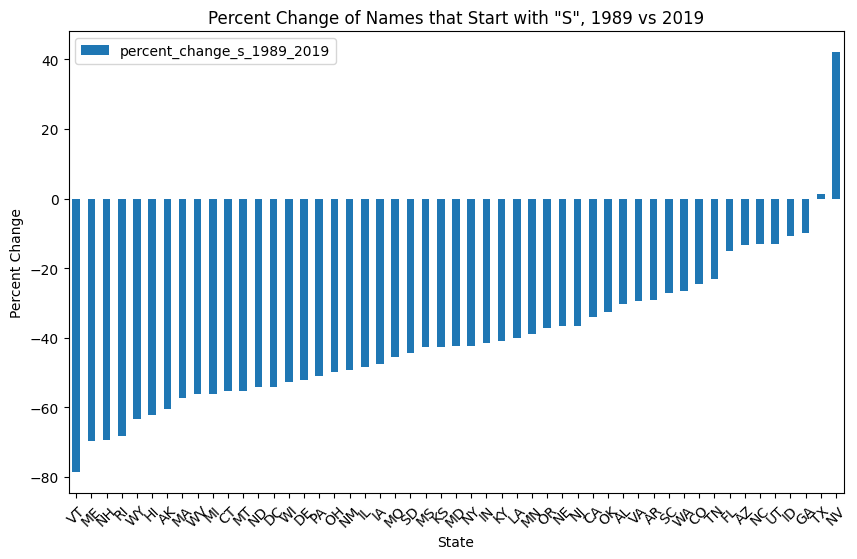

In [165]:
s_names_df_sorted = s_names_df.sort_values('percent_change_s_1989_2019')

# Select the top 5 states with the biggest drop using head()


# Create a bar plot of the top 5 states
s_names_df_sorted.plot(x='state', y='percent_change_s_1989_2019', kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Percent Change')
plt.title('Percent Change of Names that Start with "S", 1989 vs 2019')
plt.xticks(rotation=45)
plt.show()

In [168]:
con.sql("""
        select name, number
        from names
        where state = 'NV' and lower(name) like 's%'
        order by number desc;
""")

┌───────────┬────────┐
│   name    │ number │
│  varchar  │ int64  │
├───────────┼────────┤
│ Sophia    │    156 │
│ Sebastian │    143 │
│ Sarah     │    128 │
│ Stephanie │    118 │
│ Samantha  │    115 │
│ Sofia     │     98 │
│ Steven    │     88 │
│ Santiago  │     86 │
│ Scarlett  │     84 │
│ Sean      │     73 │
│  ·        │      · │
│  ·        │      · │
│  ·        │      · │
│ Salvador  │      5 │
│ Samson    │      5 │
│ Scott     │      5 │
│ Sheila    │      5 │
│ Shelly    │      5 │
│ Samira    │      5 │
│ Saoirse   │      5 │
│ Sariyah   │      5 │
│ Sloan     │      5 │
│ Sunny     │      5 │
├───────────┴────────┤
│      102 rows      │
│     (20 shown)     │
└────────────────────┘

# What Names Have Grown the Most in Popularity (and Which Have Decreased)

In [2]:
# Fetch distinct call types directly using query method
name_values = con.execute("select distinct name from names").fetchall()

# Initialize a list to store correlation values
correlations = []

# Iterate through all the call types to calculate correlation with daily high temp
for name_tuple in name_values:
    name = name_tuple[0]
    query = f"""
    with eighty_nine as (
        select name, sum(number) as sum_89
        from names
        where year = 1989 and name = '{name}'
        group by name
    ),
    twenty_nineteen as (
        select name, sum(number) as sum_19
        from names
        where year = 2019 and name = '{name}'
        group by name
    )
    select e.name, (t.sum_19 - e.sum_89) / e.sum_89 * 100 as pct_change
    from eighty_nine e
    join twenty_nineteen t on e.name = t.name;
    """
    # Execute the query directly
    result = con.execute(query).fetchall()
    # If result is empty, skip this iteration
    if not result:
        continue
    # Extract the name and percentage change from the result
    name, pct_change = result[0]
    # Append the correlation to the list
    correlations.append((name, pct_change))

# Close the connection to the database
con.close()

# Sort the correlations by the coefficient in descending order
correlations.sort(key=lambda x: x[1], reverse=True)

# Print the ranked names by correlation coefficient
print("Names ranked by correlation between count in 1989 and percentage change from 1989 to 2019")
for name, pct_change in correlations:
    print(f"{name}: {pct_change}")

Names ranked by correlation between count in 1989 and percentage change from 1989 to 2019
Easton: 97500.0
Rowan: 90760.0
Willow: 76400.0
Kinsley: 69960.0
Ryder: 68340.0
Serenity: 48642.857142857145
Luca: 44400.0
Ximena: 43340.0
Penelope: 39429.41176470588
Paisley: 38581.818181818184
Hudson: 36227.777777777774
River: 34200.0
Amaya: 33883.33333333333
Luka: 33560.0
Norah: 32650.0
Maverick: 32011.11111111111
Bella: 31035.714285714283
Lyla: 30375.0
Greyson: 28400.0
Declan: 28200.0
Aria: 27234.615384615387
Zara: 25600.0
Mateo: 25594.285714285714
Hadley: 25490.0
Nyla: 24720.0
Dawson: 24375.0
Paxton: 24316.666666666664
Evangeline: 23780.0
Ace: 23585.714285714286
Raegan: 23033.333333333336
Sawyer: 21786.363636363636
Arya: 21721.428571428572
Jayce: 21716.666666666664
Camila: 21056.756756756757
Jayla: 20766.666666666664
Adelaide: 20560.0
Jett: 19450.0
Evie: 18860.0
Enzo: 18744.444444444445
Lilah: 18716.666666666664
Rylee: 18560.0
Piper: 18547.058823529413
Asher: 18020.51282051282
Nasir: 18020.0
B

# Top Names By State in 2019

In [175]:
con.sql("""
    with states as (
        select 
            state, 
            name, 
            sum(number) as total
        from names
        where year = 2019
        group by state, name
        order by total desc
    )
    select 
        state, 
        name
    from (
        select state, name, row_number() over (partition by state order by total desc) as rn
        from states
    ) subquery
    where rn = 1;
""")

┌─────────┬───────────┐
│  state  │   name    │
│ varchar │  varchar  │
├─────────┼───────────┤
│ CA      │ Noah      │
│ HI      │ Noah      │
│ LA      │ Noah      │
│ WA      │ Olivia    │
│ GA      │ Ava       │
│ CT      │ Olivia    │
│ WI      │ Oliver    │
│ MA      │ Benjamin  │
│ MS      │ Ava       │
│ NE      │ Oliver    │
│ ·       │  ·        │
│ ·       │  ·        │
│ ·       │  ·        │
│ MD      │ Liam      │
│ MT      │ Oliver    │
│ UT      │ Oliver    │
│ AK      │ Liam      │
│ CO      │ Liam      │
│ IN      │ Liam      │
│ OH      │ Liam      │
│ OR      │ Oliver    │
│ TN      │ William   │
│ NH      │ Charlotte │
├─────────┴───────────┤
│ 51 rows (20 shown)  │
└─────────────────────┘

In [12]:
name_map_df = con.sql("""
    with states as (
        select 
            state, 
            name, 
            sum(number) as total
        from names
        where year = 2019
        group by state, name
        order by total desc
    )
    select 
        state, 
        name
    from (
        select state, name, row_number() over (partition by state order by total desc) as rn
        from states
    ) subquery
    where rn = 1
    order by name;
""").df()
name_map_df

,state,name
0,GA,Ava
1,MS,Ava
2,MA,Benjamin
3,NH,Charlotte
4,MN,Henry
5,ND,Liam
6,OK,Liam
7,MO,Liam
8,VA,Liam
9,WV,Liam
